<center>
        <h1>Jupyter notebook Data Pro Max</h1>
        <em>Jordan | Maori | Iryna | Tessa</em>
    </center>
</div>

<h4><strong>Importation des Bibliothèques et Configuration de l’Environnement :</strong></h4>

In [494]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [495]:
# Charger le fichier CSV
df = pd.read_csv('Camp_Market.csv', sep=';') # Charger le fichier CSV avec le bon séparateur





In [496]:
# Informations sur les données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [497]:
# Checking if any NaN is present in column or not
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

<hr>

<h4><strong>Nettoyage des données :</strong></h4>

In [498]:
# Calculer la moyenne des salaires par groupe d'éducation
mean_income_by_education = df.groupby('Education')['Income'].mean()
print(mean_income_by_education)

# Remplacer les valeurs manquantes dans Income par la moyenne selon le groupe d'éducation
df['Income'] = df.apply(
    lambda row: mean_income_by_education[row['Education']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)
# Vérifier s'il reste des valeurs manquantes dans la colonne Income
df['Income'].isnull().sum()


Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


np.int64(0)

In [499]:
# Supprimer la ligne où le salaire est égal à 666666.0
df = df[df['Income'] != 666666.0]
# Vérifier les 10 plus gros salaires après suppression
top_10_incomes = df['Income'].sort_values(ascending=False).head(10)
print(top_10_incomes)



617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
Name: Income, dtype: float64


<hr>

<h4><strong>Traitement + analyses selon les âges des consommateurs :</strong></h4>

[67 70 59 40 43 57 53 39 50 74 41 48 65 72 37 78 44 75 42 45 73 55 38 35
 61 54 51 81 49 28 56 60 47 46 69 58 36 76 66 52 64 79 33 62 71 63 68 32
 34 77 31 30 83 80 29 84]


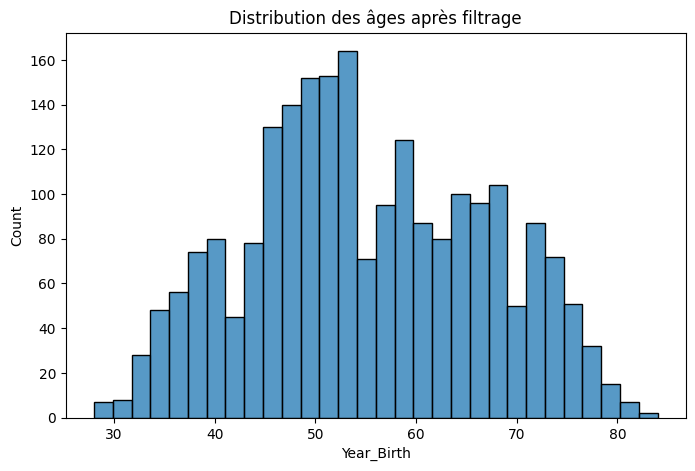

In [500]:
# Calculer les âges à partir de l'année de naissance
ages = 2024 - df['Year_Birth']

# Filtrer les âges indésirables (124, 125, 131 ans)
data_filtered = df[~ages.isin([124, 125, 131])]

# Recalculer les âges après filtrage
ages_filtered = 2024 - data_filtered['Year_Birth']

# Vérifier si les âges indésirables sont bien enlevés
print(ages_filtered.unique())  # Ceci devrait exclure 124, 125 et 131

# Visualiser la distribution des âges après filtrage
plt.figure(figsize=(8,5))
sns.histplot(ages_filtered, bins=30)
plt.title('Distribution des âges après filtrage')
plt.show()



<hr>

<h4><strong>Analyse des revenus :</strong></h4>

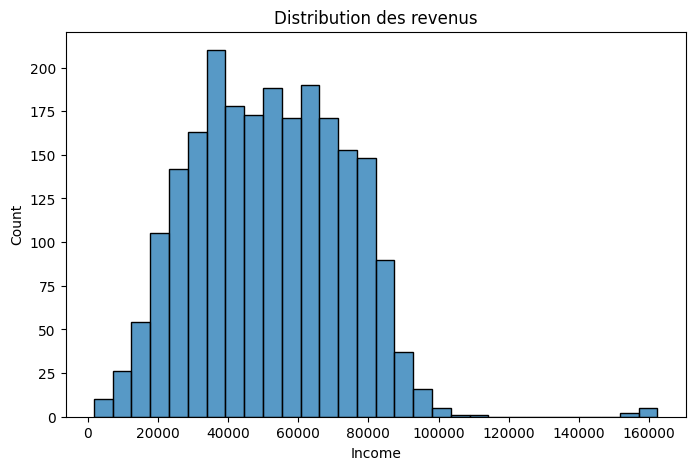

In [501]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'].dropna(), bins=30)
plt.title('Distribution des revenus')
plt.show()


<hr>

<h4><strong>Traitement + analyses selon le statut matrimonial :</strong></h4>

['single' 'together' 'married' 'divorced' 'widow' 'alone']


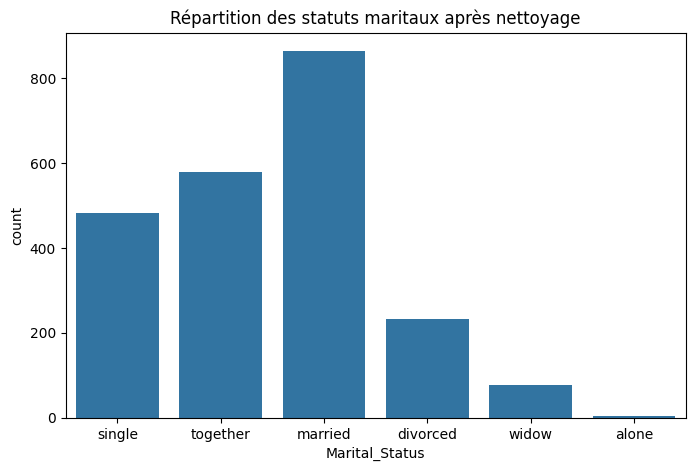

In [502]:
# Convertir toutes les valeurs en minuscules et supprimer les espaces avant/après
df['Marital_Status'] = df['Marital_Status'].str.lower().str.strip()

# Supprimer les lignes où 'Marital_Status' est égal à 'absurd'
df = df[df['Marital_Status'] != 'absurd']

# Remplacer 'yolo' par 'single'
df['Marital_Status'] = df['Marital_Status'].replace('yolo', 'single')

# Vérifier les valeurs uniques après modification
print(df['Marital_Status'].unique())

# Bar chart pour la répartition des statuts maritaux après modification
plt.figure(figsize=(8,5))
sns.countplot(x='Marital_Status', data=df)
plt.title('Répartition des statuts maritaux après nettoyage')
plt.show()



<hr>

<h4><strong>Analyse des différents niveaux d'éducation :</strong></h4>

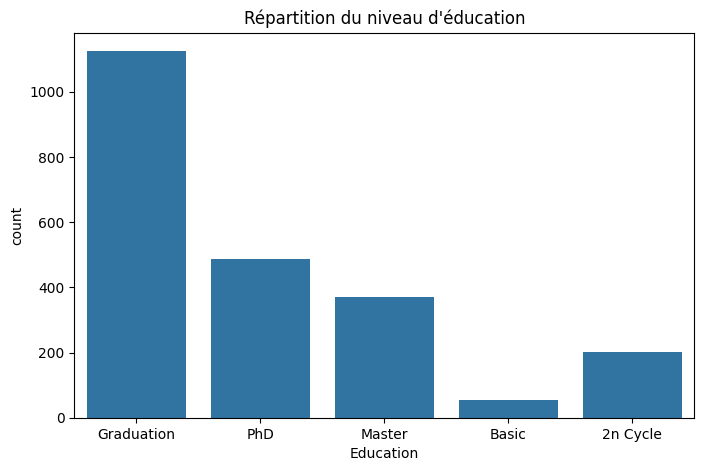

In [503]:
plt.figure(figsize=(8,5))
sns.countplot(x='Education', data=df)
plt.title('Répartition du niveau d\'éducation')
plt.show()


<hr>

<h4><strong>Analyse des comportements d'achat :</strong></h4>

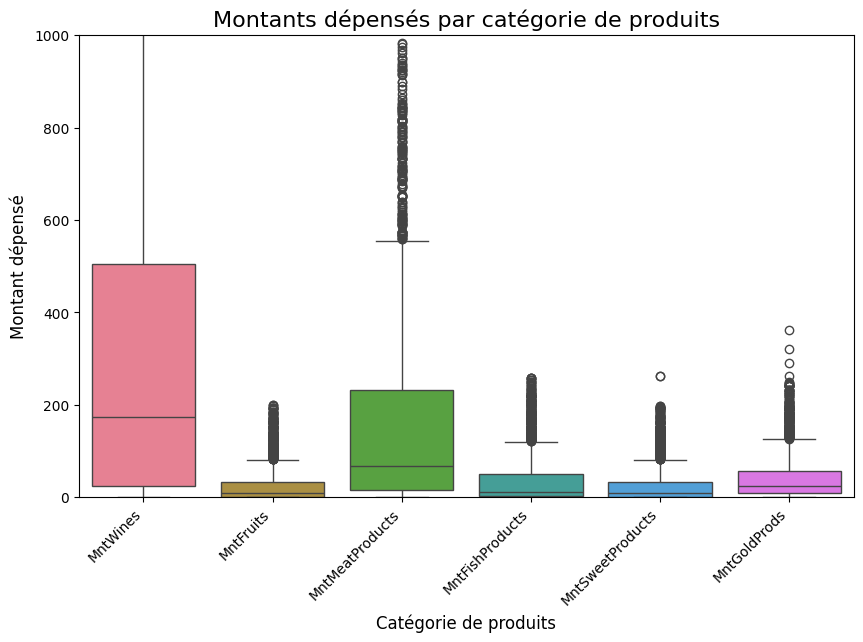

In [504]:
# Définir une palette de couleurs pour chaque catégorie
palette = sns.color_palette("husl", 6)

# Créer le boxplot avec une palette colorée et des étiquettes plus lisibles
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], 
            palette=palette, showfliers=True)

# Ajuster l'échelle pour rendre le graphique plus lisible
plt.ylim(0, 1000)  # Limite l'échelle pour éviter les valeurs extrêmes trop élevées

# Ajouter un titre et ajuster les étiquettes
plt.title('Montants dépensés par catégorie de produits', fontsize=16)
plt.ylabel('Montant dépensé', fontsize=12)
plt.xlabel('Catégorie de produits', fontsize=12)

# Tourner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()



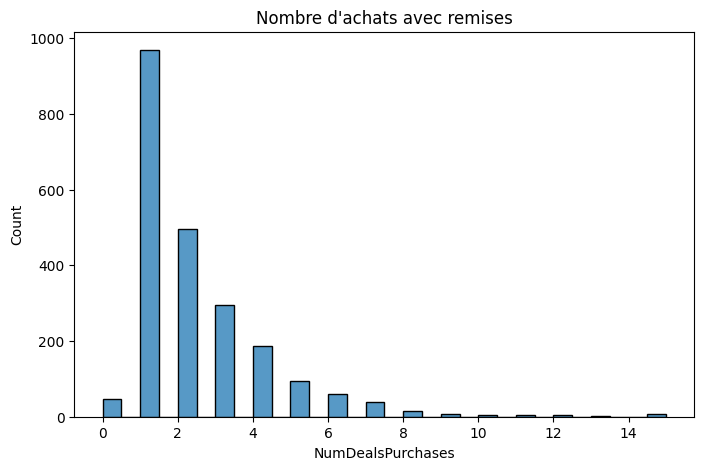

In [505]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumDealsPurchases'], bins=30)
plt.title('Nombre d\'achats avec remises')
plt.show()


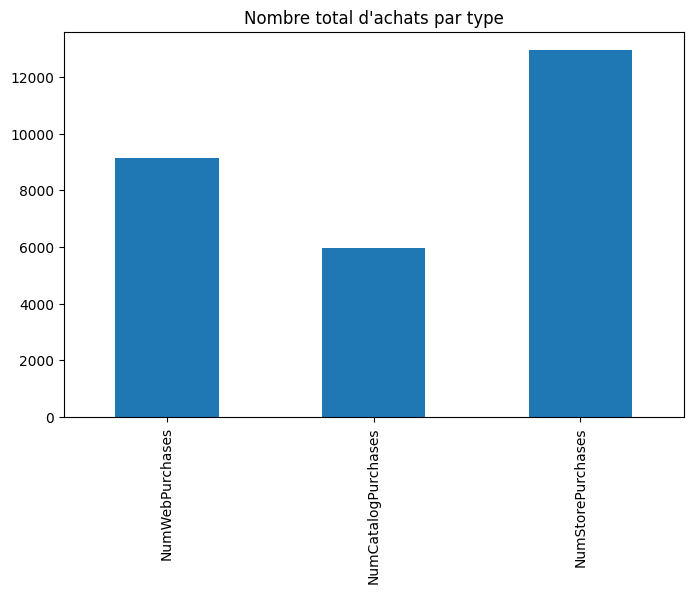

In [506]:
types_achats = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[types_achats].sum().plot(kind='bar', figsize=(8,5))
plt.title('Nombre total d\'achats par type')
plt.show()


<hr>

<h4><strong>Analyses des réponses aux campagnes marketing et engagement :</strong></h4>

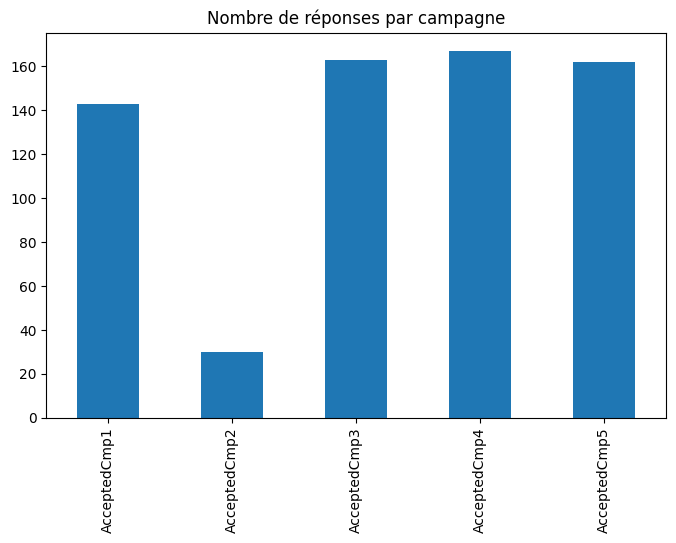

In [507]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df[campaigns].sum().plot(kind='bar', figsize=(8,5))
plt.title('Nombre de réponses par campagne')
plt.show()


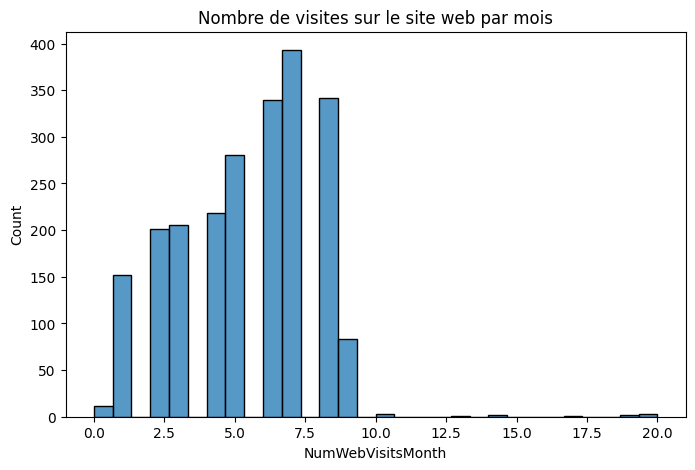

In [508]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumWebVisitsMonth'], bins=30)
plt.title('Nombre de visites sur le site web par mois')
plt.show()


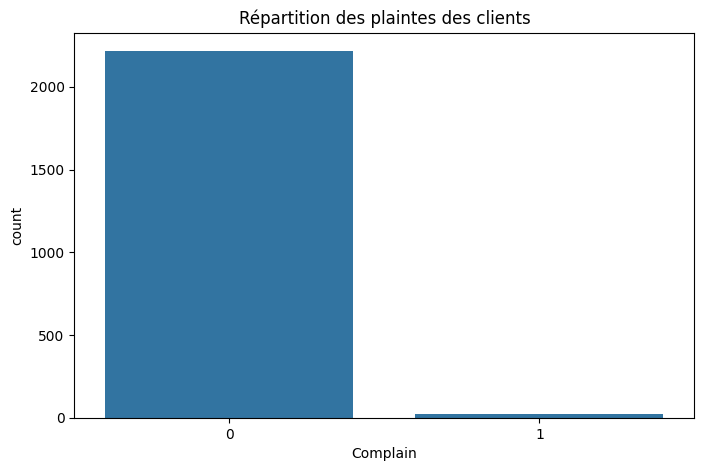

In [509]:
plt.figure(figsize=(8,5))
sns.countplot(x='Complain', data=df)
plt.title('Répartition des plaintes des clients')
plt.show()


<hr>

<h4><strong>Analyses des correélations entre variables :</strong></h4>

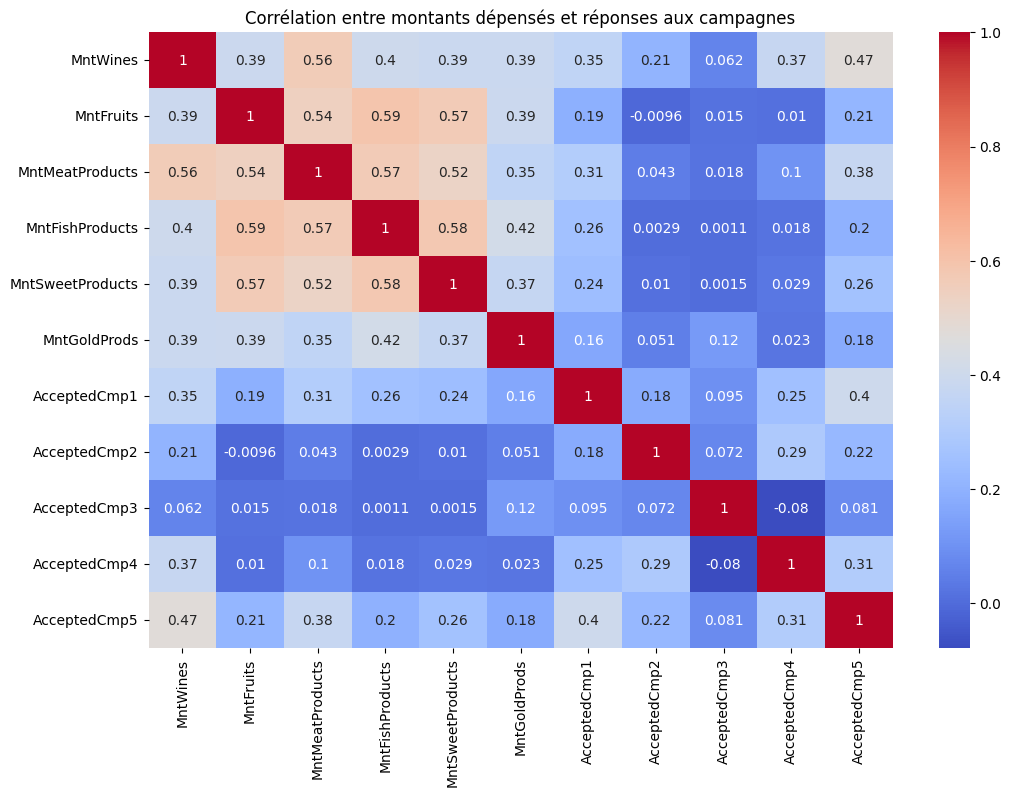

In [510]:
plt.figure(figsize=(12,8))
corr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] + campaigns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre montants dépensés et réponses aux campagnes')
plt.show()


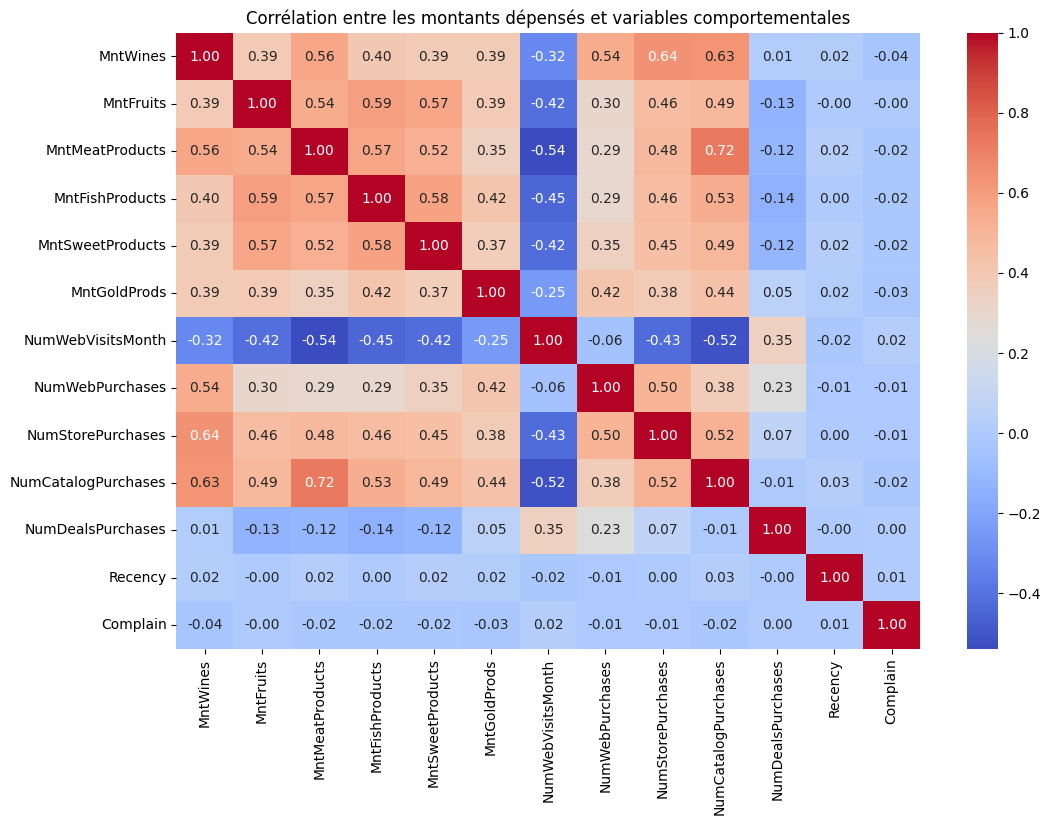

In [511]:
#Heatmap globale comprenant : NumWebVisitsMonth, NumWebPurchases, NumStorePurchases, NumCatalogPurchases, NumDealsPurchases, Recency et Complain 

# Variables comportementales supplémentaires
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
             'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 
             'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 
             'NumDealsPurchases', 'Recency', 'Complain']

# Calculer la matrice de corrélation
corr_matrix = data_filtered[variables].corr()

# Afficher la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélation entre les montants dépensés et variables comportementales')
plt.show()


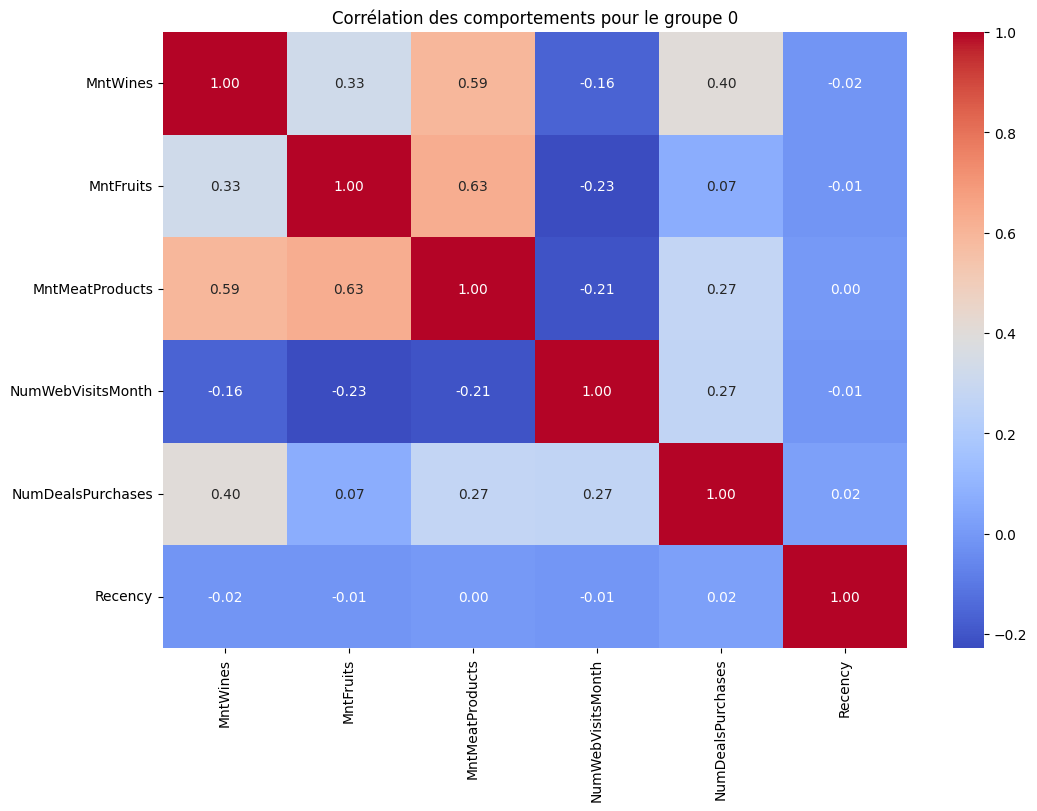

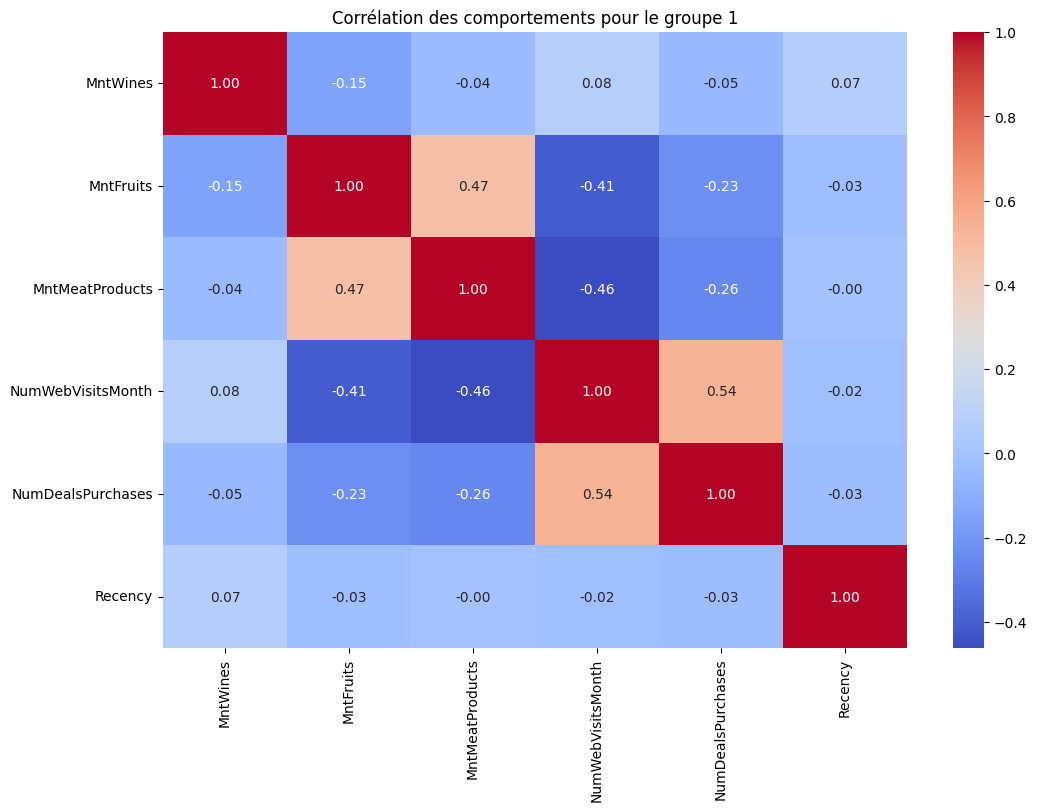

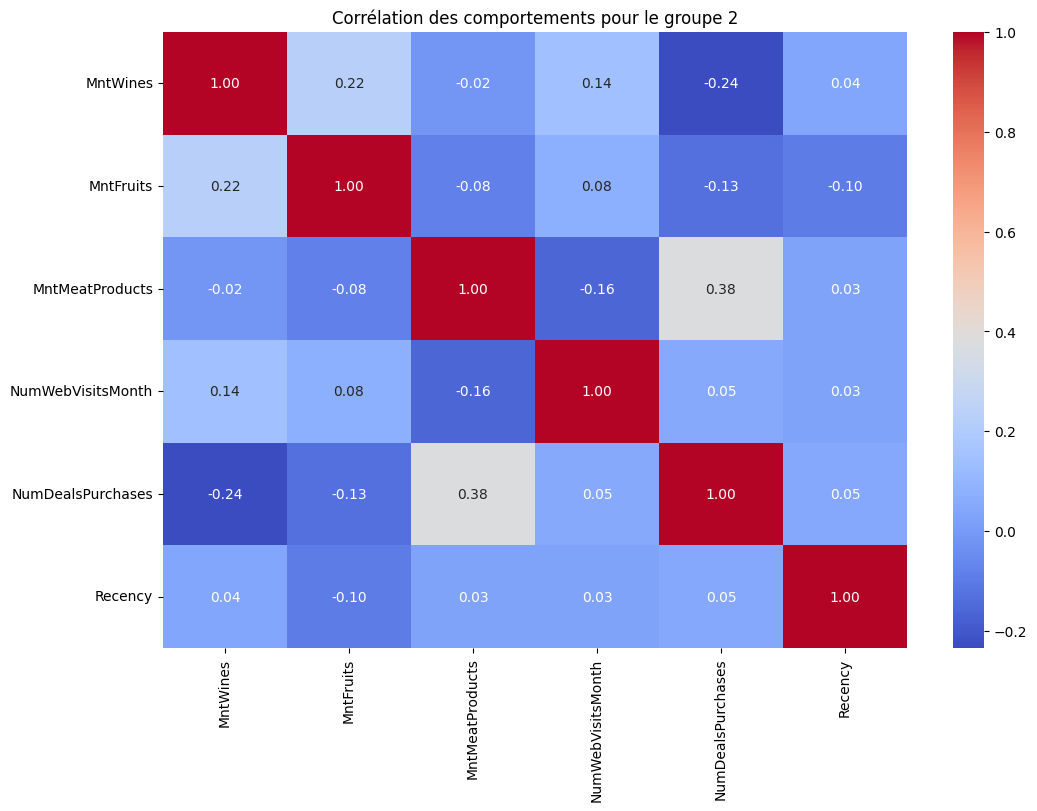

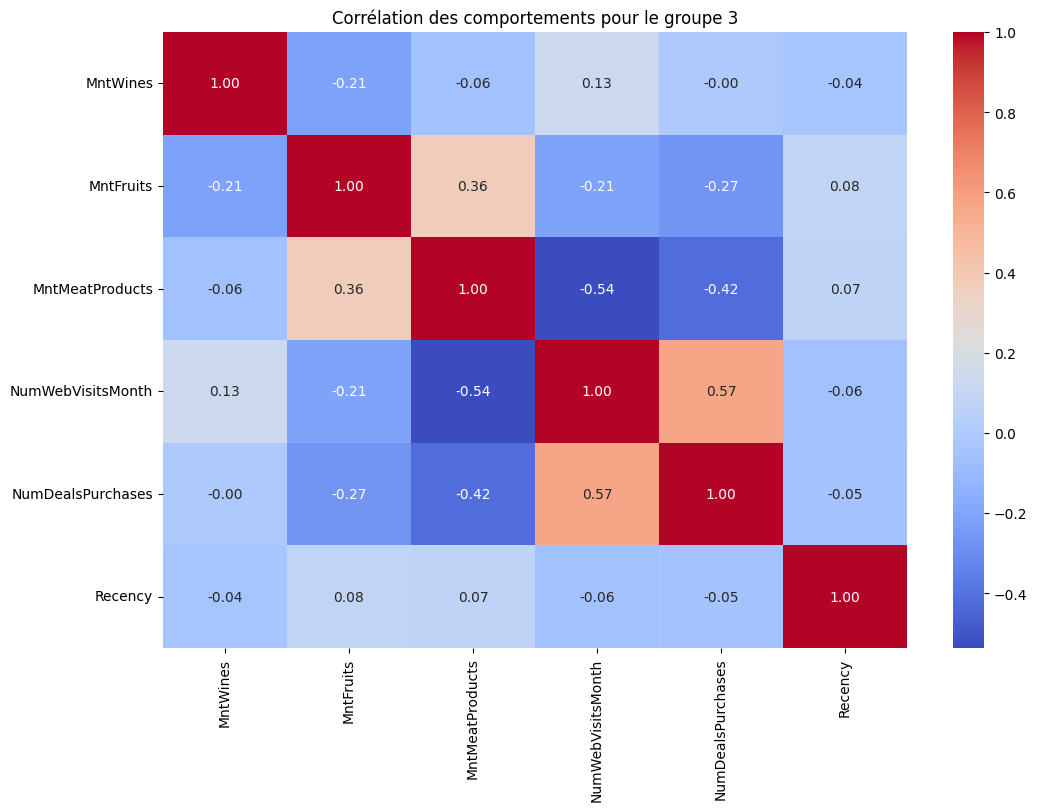

In [512]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Sélection des variables pour le clustering
clustering_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Recency']

# Appliquer KMeans avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_filtered['Cluster'] = kmeans.fit_predict(data_filtered[clustering_vars])

# Heatmaps segmentées par groupe
for cluster in sorted(data_filtered['Cluster'].unique()):
    plt.figure(figsize=(12, 8))
    cluster_data = data_filtered[data_filtered['Cluster'] == cluster]
    corr_matrix = cluster_data[clustering_vars].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Corrélation des comportements pour le groupe {cluster}")
    plt.show()

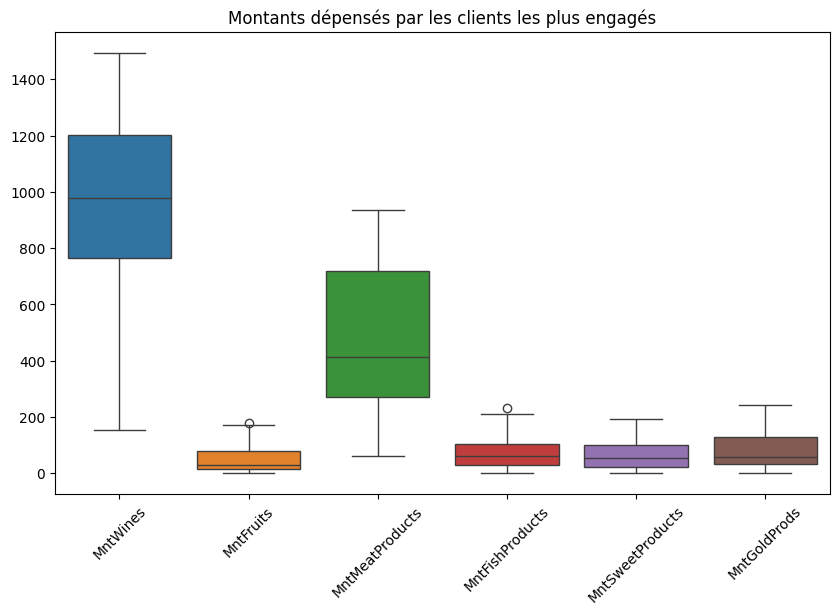

In [513]:
# Créer un score d'engagement en fonction des réponses aux campagnes
data_filtered['Engagement_Score'] = data_filtered[campaigns].sum(axis=1)

# Analyser les clients les plus engagés (par exemple, ceux avec un score >= 3)
engaged_clients = data_filtered[data_filtered['Engagement_Score'] >= 3]

# Visualiser les montants dépensés par les clients les plus engagés
plt.figure(figsize=(10,6))
sns.boxplot(data=engaged_clients[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title('Montants dépensés par les clients les plus engagés')
plt.xticks(rotation=45)
plt.show()


FEETURE ENGINEERING

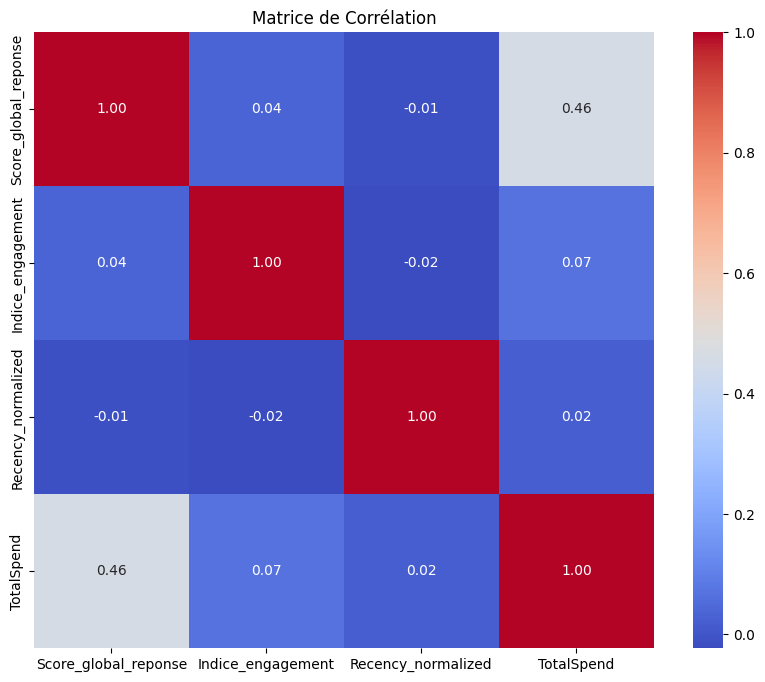

In [514]:
df['Score_global_reponse'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df['Indice_engagement'] = (df['NumWebVisitsMonth'] + df['NumWebPurchases']) / 2
df['Indice_engagement'] = (df['NumWebVisitsMonth'] + df['NumWebPurchases']) / 2

# Normalisation de Recency
df['Recency_normalized'] = (df['Recency'] - df['Recency'].min()) / (df['Recency'].max() - df['Recency'].min())

# Vérifiez si la colonne TotalSpend existe, sinon créez-la ou ajustez la logique
if 'TotalSpend' not in df.columns:
    # Exemples de colonnes que vous pourriez utiliser pour calculer les dépenses totales
    df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

correlation_matrix = df[['Score_global_reponse', 'Indice_engagement', 'Recency_normalized', 'TotalSpend']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

<hr>

<h4><strong>Analyses des clusters :</strong></h4>

{'Logistic Regression': {'Accuracy': 0.8660714285714286, 'F1 Score': np.float64(0.25), 'AUC-ROC': np.float64(0.7243460313187059)}, 'Random Forest': {'Accuracy': 0.8482142857142857, 'F1 Score': np.float64(0.2765957446808511), 'AUC-ROC': np.float64(0.7156189707004084)}, 'Gradient Boosting': {'Accuracy': 0.8549107142857143, 'F1 Score': np.float64(0.25287356321839083), 'AUC-ROC': np.float64(0.7221250056086508)}}
Meilleurs paramètres pour Random Forest: {'max_depth': 10, 'n_estimators': 100}


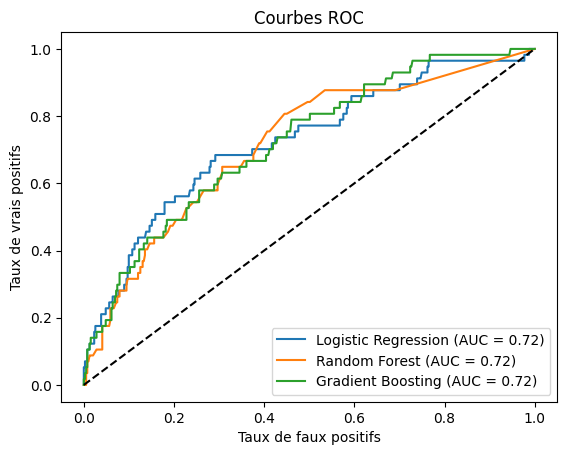

In [515]:
# Variables indépendantes 
X = df[['Score_global_reponse', 'Indice_engagement', 'Recency_normalized', 'NumWebPurchases', 'NumStorePurchases']]

# Variable cible 
y = df['Response']  # Variable binaire indiquant la réponse aux campagnes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'F1 Score': f1_score(y_test, y_pred_lr),
        'AUC-ROC': roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf),
        'AUC-ROC': roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_score(y_test, y_pred_gb),
        'F1 Score': f1_score(y_test, y_pred_gb),
        'AUC-ROC': roc_auc_score(y_test, model_gb.predict_proba(X_test)[:, 1])
    }
}

print(metrics)


from sklearn.model_selection import GridSearchCV

param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train, y_train)

print(f"Meilleurs paramètres pour Random Forest: {grid_search_rf.best_params_}")


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modèles et leurs prédictions
models = [model_lr, model_rf, model_gb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure()
for model, model_name in zip(models, model_names):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

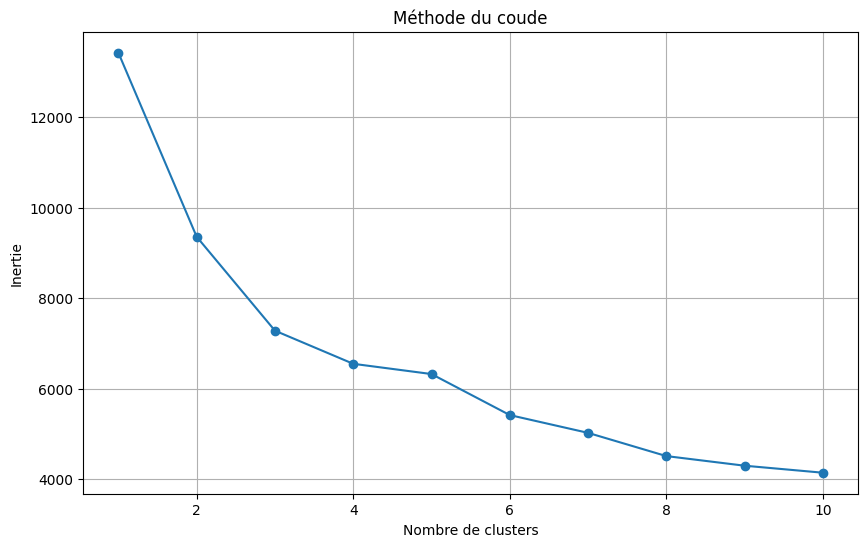

In [516]:
# Supposons que df soit votre DataFrame
from sklearn.discriminant_analysis import StandardScaler


features = df[['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'NumWebPurchases', 'Indice_engagement']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Déterminer le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()

# Choisissez un nombre de clusters basé sur la courbe
n_clusters = 4  # Exemple basé sur la courbe
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

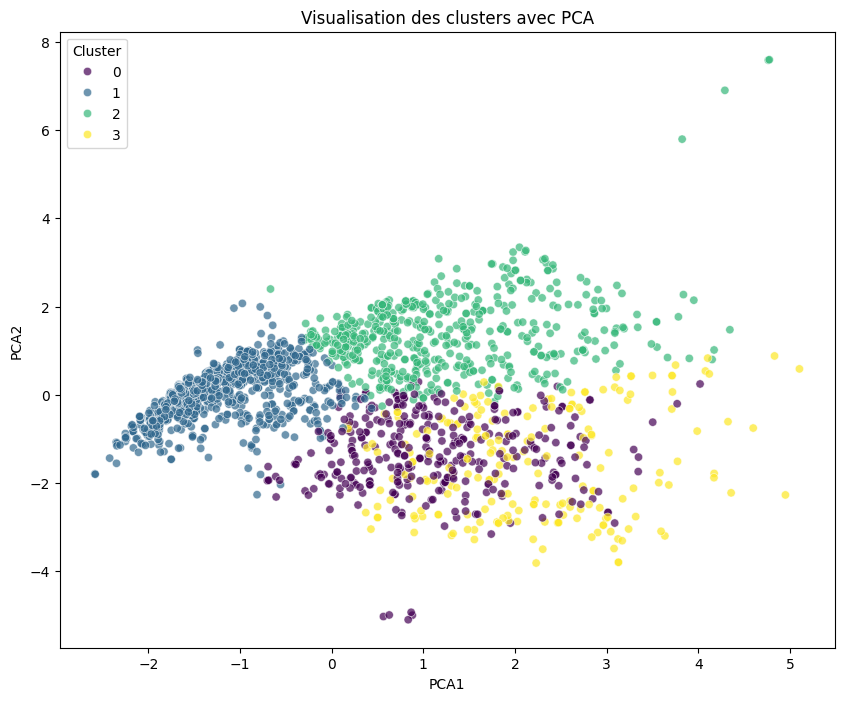

In [517]:
# PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Ajout des résultats PCA au DataFrame
df['PCA1'] = features_pca[:, 0]
df['PCA2'] = features_pca[:, 1]

# Visualiser les clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Visualisation des clusters avec PCA')
plt.show()

In [518]:
# Profiler chaque segment
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cluster_profiles = df.groupby('Cluster')[numeric_cols].mean()

# Affichage des profils des clusters
print(cluster_profiles)

                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5636.345930  1966.854651  76736.471215  0.049419  0.209302   
1        5671.173043  1970.456522  37899.181884  0.700000  0.510435   
2        5311.155844  1966.187384  57967.843690  0.293135  0.781076   
3        5791.362745  1969.607843  73581.259352  0.068627  0.264706   

           Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                        
0        53.430233  671.747093   36.494186       484.543605        81.752907   
1        48.953913   64.372174    6.914783        31.053913        11.303478   
2        48.434137  492.363636   21.864564       151.564007        38.283859   
3        44.573529  537.269608  129.622549       437.436275       107.259804   

         ...  Z_CostContact  Z_Revenue  Response  Score_global_reponse  \
Cluster  ...      

SMOTE 

In [520]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Liste des colonnes catégoriques
X2 = df[['Score_global_reponse', 'Indice_engagement', 'Recency_normalized', 'NumWebPurchases', 'NumStorePurchases','Dt_Customer']]
categorical_cols = ['Marital_Status', 'Education']

# Vérifier et corriger la colonne 'Dt_Customer'
# Convertir en datetime avec gestion des erreurs
X2['Dt_Customer'] = pd.to_datetime(X2['Dt_Customer'], errors='coerce')

# Remplacer les valeurs manquantes par une date par défaut (ex. : 2000-01-01)
X2['Dt_Customer'].fillna(pd.Timestamp("2000-01-01"), inplace=True)

# Convertir les dates en jours écoulés depuis le 01-01-2000
X2['Dt_Customer'] = (X2['Dt_Customer'] - pd.Timestamp("2000-01-01")).dt.days

# Vérifier les colonnes non numériques restantes
non_numeric_cols = X2.select_dtypes(include=['object']).columns
print("Colonnes non numériques restantes avant encodage : ", non_numeric_cols)

# Créer un transformer pour OneHotEncoder sur les colonnes catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)],  # One-hot encode les colonnes catégoriques
    remainder='passthrough')  # Conserver les autres colonnes sans transformation
print(X2.head)



Colonnes non numériques restantes avant encodage :  Index([], dtype='object')
<bound method NDFrame.head of       Score_global_reponse  Indice_engagement  Recency_normalized  \
0                        0                7.5            0.585859   
1                        0                3.0            0.383838   
2                        0                6.0            0.262626   
3                        0                4.0            0.262626   
4                        0                5.0            0.949495   
...                    ...                ...                 ...   
2235                     0                7.0            0.464646   
2236                     1                7.5            0.565657   
2237                     1                4.0            0.919192   
2238                     0                4.5            0.080808   
2239                     0                5.0            0.404040   

      NumWebPurchases  NumStorePurchases  Dt_Customer  
0      

In [521]:
print(X2.dtypes)


Score_global_reponse      int64
Indice_engagement       float64
Recency_normalized      float64
NumWebPurchases           int64
NumStorePurchases         int64
Dt_Customer               int64
dtype: object


In [522]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Nombre d'arbres
    'max_depth': [10, 20, 30, None],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Minimum d'échantillons dans une feuille
    'max_features': ['auto', 'sqrt', 'log2']  # Nombre de caractéristiques à considérer pour chaque split
}

# Initialiser le modèle Random Forest
rf = RandomForestClassifier(random_state=42)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entraîner GridSearch sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluer le modèle optimisé
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [523]:
import joblib

# Sauvegarder le meilleur modèle trouvé par GridSearchCV
joblib.dump(best_rf, 'random_forest_best_model.pkl')
print("Modèle sauvegardé sous le nom 'random_forest_best_model.pkl'")


Modèle sauvegardé sous le nom 'random_forest_best_model.pkl'


In [524]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Définir la grille des hyperparamètres à tester avec uniquement 50 arbres
param_grid = {
    'n_estimators': [50],  # Uniquement 50 arbres
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taux d'apprentissage
    'max_depth': [3, 5, 7],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons dans une feuille
    'subsample': [0.8, 1.0],  # Fraction des échantillons utilisée pour chaque arbre
}

# Initialiser le modèle Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Initialiser GridSearchCV avec la validation croisée
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entraîner GridSearch sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluer le modèle optimisé
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

# Afficher le rapport de classification et la matrice de confusion
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.1

In [525]:
import joblib

# Sauvegarder le meilleur modèle trouvé par GridSearchCV
joblib.dump(best_gb, 'gradient_boosting_best_model.pkl')
print("Modèle sauvegardé sous le nom 'gradient_boosting_best_model.pkl'")


Modèle sauvegardé sous le nom 'gradient_boosting_best_model.pkl'


Centroïdes des clusters :
[[530.52659574 709.40957447   2.42021277   1.35638298  51.57978723
   70.87234043]
 [ 61.37520259  36.54051864   6.26256078   2.24959481  49.06807131
    9.17747164]
 [440.48275862 193.64246824   4.52268603   2.9092559   48.47005445
   39.91470054]
 [992.09848485 333.96969697   4.64015152   2.14393939  48.9469697
   45.8030303 ]]


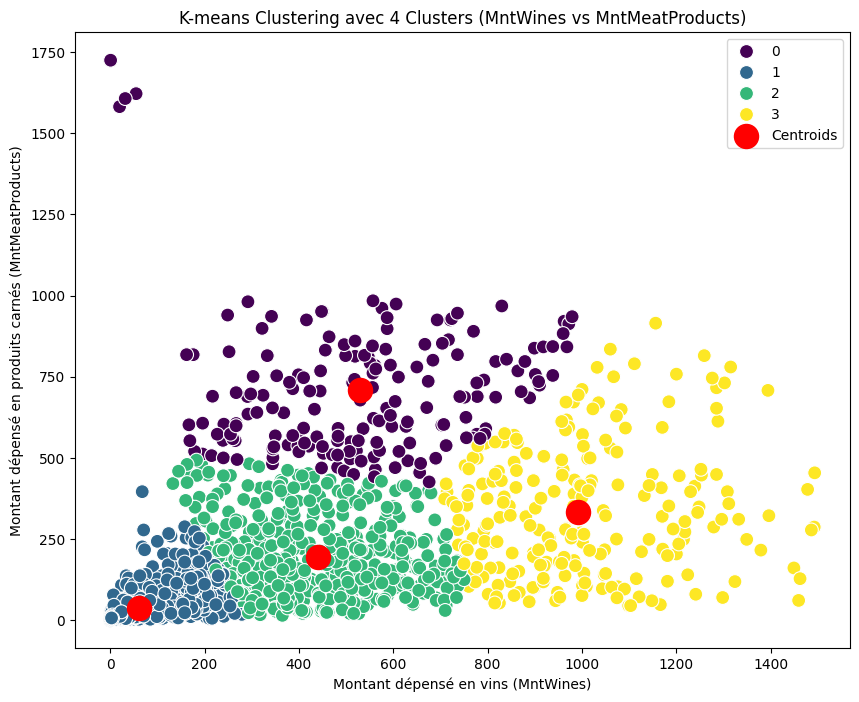

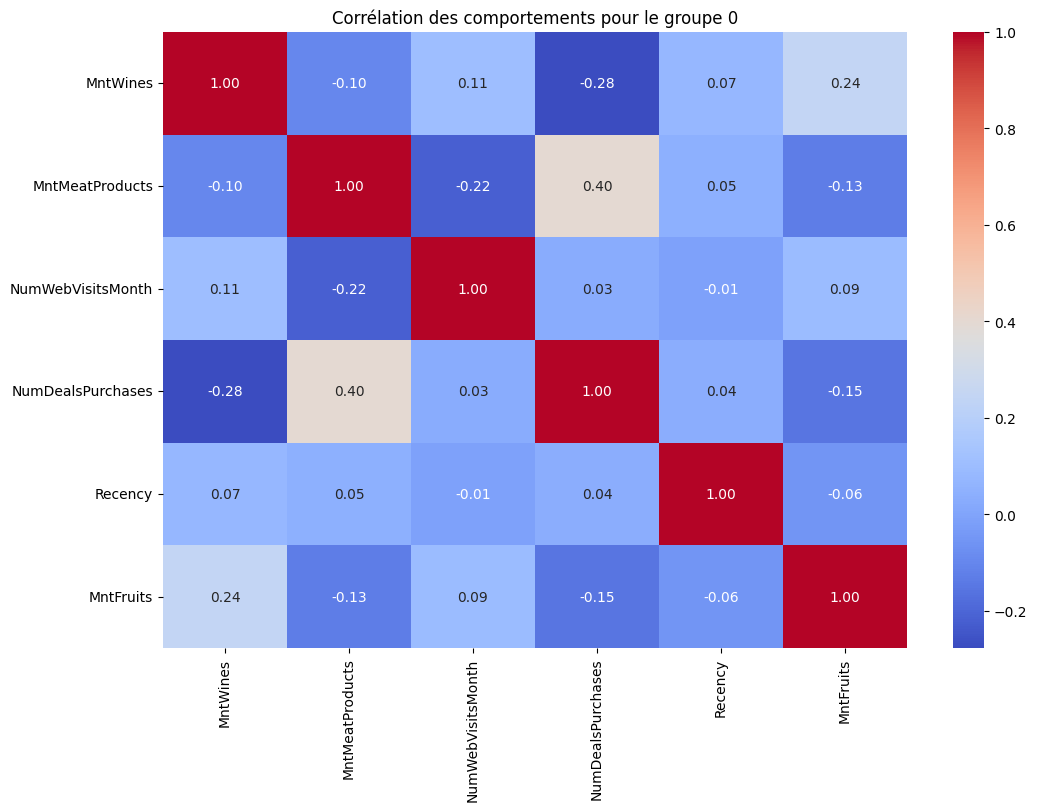

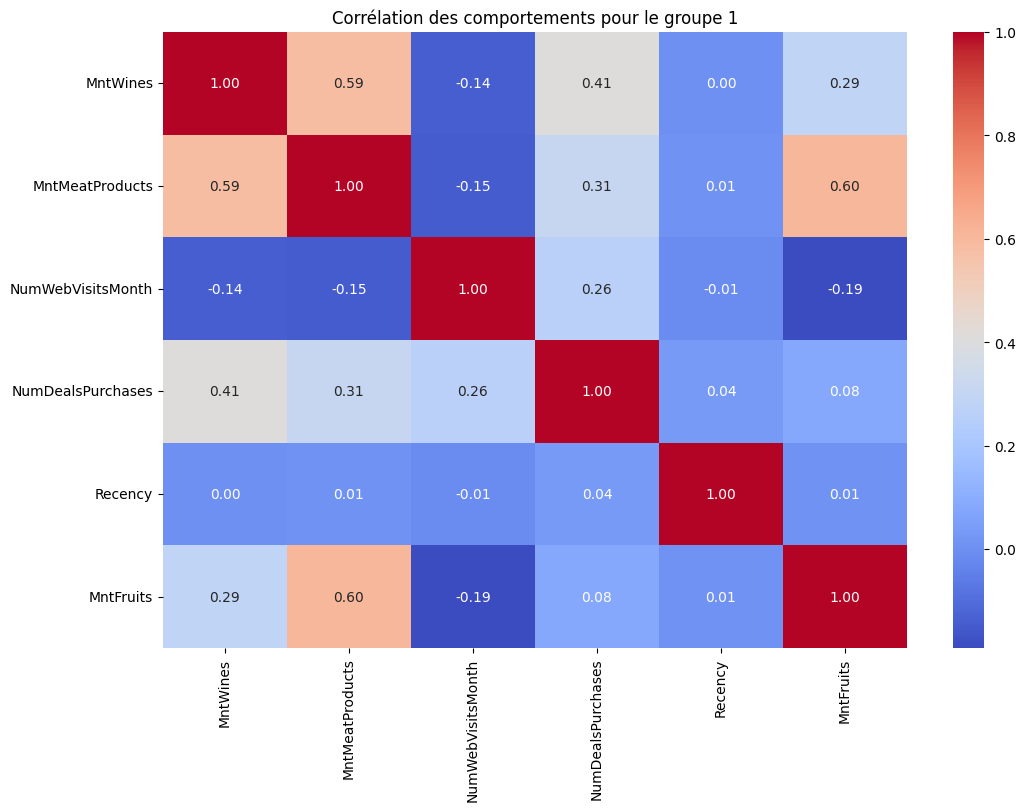

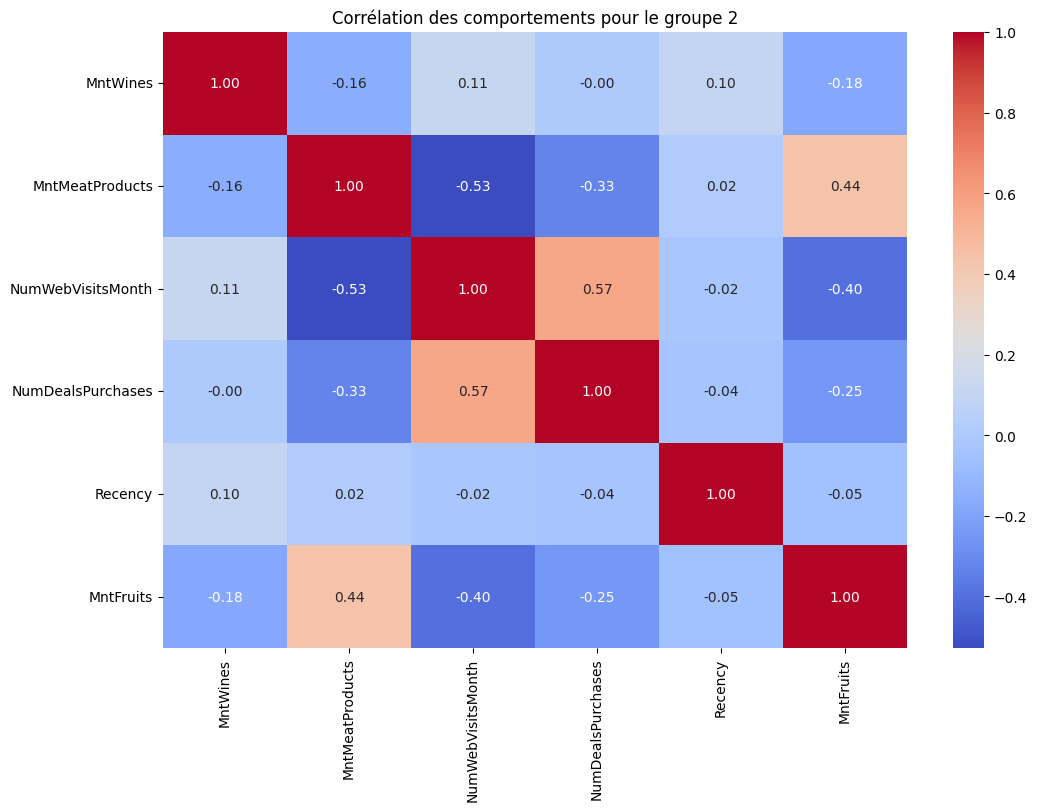

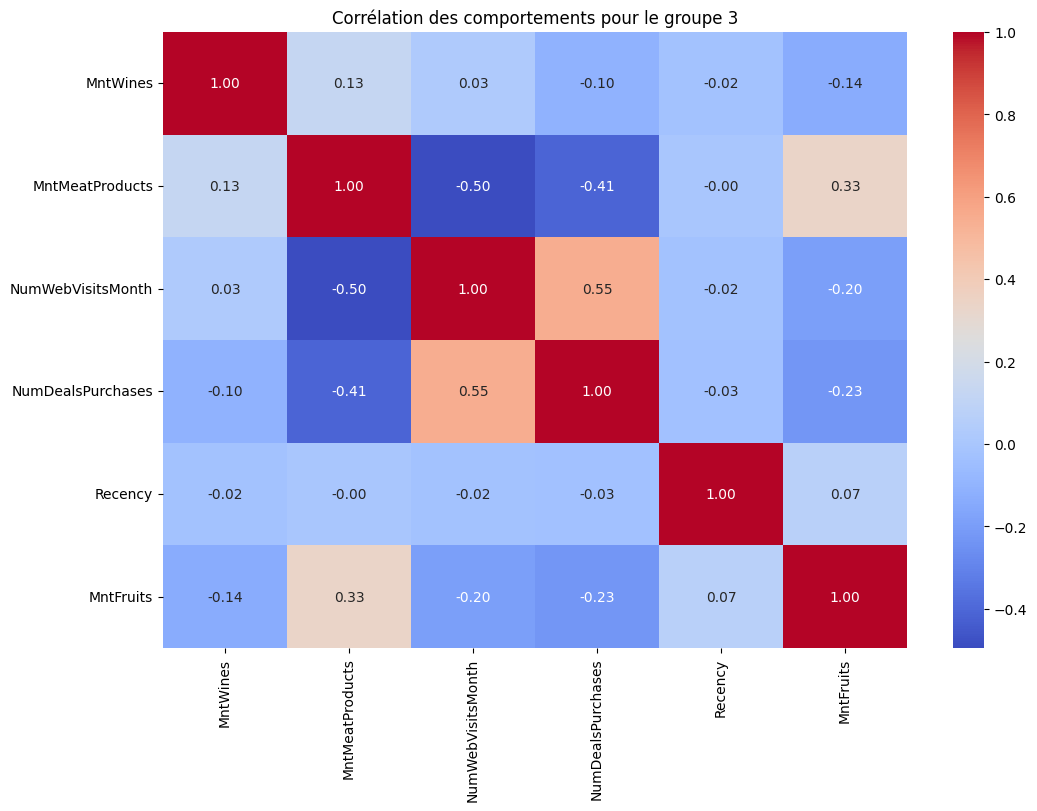

In [528]:
# Importation des bibliothèques nécessaires
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supposons que vous ayez un DataFrame 'df' avec les données
# Sélection des variables comportementales et d'achat pertinentes pour le clustering
clustering_vars = ['MntWines', 'MntMeatProducts', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Recency', 'MntFruits']

# Appliquer K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[clustering_vars])

# Afficher les centroïdes des clusters
print("Centroïdes des clusters :")
print(kmeans.cluster_centers_)

# Visualisation des clusters en utilisant deux des variables principales (ex. MntWines et MntMeatProducts)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['MntWines'], y=df['MntMeatProducts'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering avec 4 Clusters (MntWines vs MntMeatProducts)')
plt.xlabel('Montant dépensé en vins (MntWines)')
plt.ylabel('Montant dépensé en produits carnés (MntMeatProducts)')
plt.legend()
plt.show()

# Pour une analyse plus complète, vous pouvez aussi afficher une heatmap pour chaque cluster
# Heatmaps segmentées par groupe
for cluster in sorted(df['Cluster'].unique()):
    plt.figure(figsize=(12, 8))
    cluster_data = df[df['Cluster'] == cluster]
    corr_matrix = cluster_data[clustering_vars].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Corrélation des comportements pour le groupe {cluster}')
    plt.show()

